---- 
## Transmitancje
---- 

$$ H1(s) = {{s} \over {5s + 1}} $$  
$$ H2(s) = {{2} \over {s + 3}} $$  
$$ H3(s) = {{s + 2} \over {s + 3}} $$  
$$ H4(s) = {{s + 2} \over {s + 1}} $$  
$$ H5(s) = {{2s + 3} \over {2s + 4}} $$
$$ H6(s) = {{1} \over {2s^2 + s + 1}} $$    

In [2]:
%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)

In [3]:
#Charakterystyka amplitudowa i fazowa układu - metoda analityczna

#declare symbolic variable 'ω' (omega)
ω = sympy.Symbol('ω', real = True)

#declare symbolic variable 's'
s = 0 + sympy.I*ω

# transmitancja układów
H = 1 / (2*s**2 + s +1)
display(H)

# wyznaczenie części rzeczywistej i urojonej transmitancji
real = sympy.re(H)
imag = sympy.im(H)
display(real)
display(imag)

# wyznaczenie modułu i argumentu transmitancji
modul = sympy.sqrt(real**2 + imag**2) #sympy.Abs(H)
phase = sympy.atan(imag/real)
display(modul)
display(phase)

1/(-2*ω**2 + I*ω + 1)

(1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2)

-ω/(ω**2 + (1 - 2*ω**2)**2)

sqrt(ω**2/(ω**2 + (1 - 2*ω**2)**2)**2 + (1 - 2*ω**2)**2/(ω**2 + (1 - 2*ω**2)**2)**2)

-atan(ω/(1 - 2*ω**2))

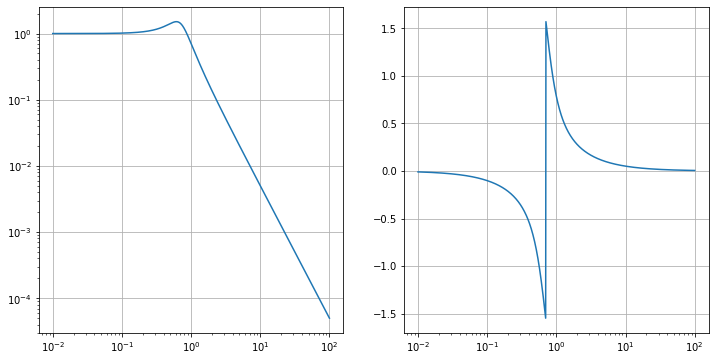

In [4]:
#Charakterystyka amplitudowa i fazowa układu - metoda analityczna - wykres

#wykres charakterystyki amplitudowej i charakterystyki fazowej
W = np.logspace(-2,2,1000)
M = sympy.lambdify(ω, modul, 'numpy')
P = sympy.lambdify(ω, phase, 'numpy')

fig = plt.figure(figsize=default_figsize)

plt.subplot(1,2,1)
plt.loglog(W, M(W))
plt.grid()

plt.subplot(1,2,2)
plt.semilogx(W, P(W))
plt.grid()

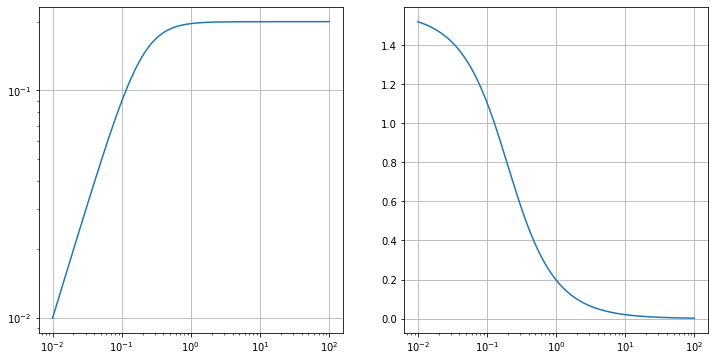

In [5]:
#Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
#numpy
#kolejny wykres charakterystyki amplitudowej i fazowej
w = np.logspace(-2, 2, 1000)
B = np.poly1d([1, 0])
A = np.poly1d([5, 1])
s = w * 1j
H = B(s) / A(s)
M = np.abs(H)
P = np.angle(H)

fig, axs = plt.subplots(1,2,figsize=default_figsize)

axs[0].loglog(w, M)
axs[0].grid()

axs[1].semilogx(w, P)
axs[1].grid()

fig.tight_layout

fig.show()

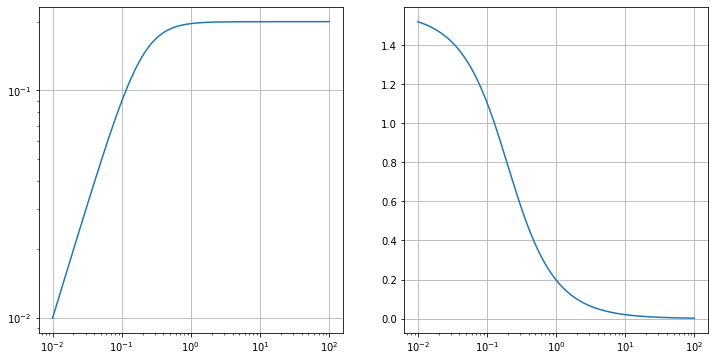

In [7]:
#Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
#scipy
#jeszcze jeden wykres charakterystyki amplitudowej i fazowej

w = np.logspace(-2, 2, 1000)
B = np.poly1d([1, 0])
A = np.poly1d([5, 1])
s = w * 1j
H = scipy.signal.freqs(B, A, w)[1]
M = np.abs(H)
P = np.angle(H)

fig, axs = plt.subplots(1,2,figsize=default_figsize)

axs[0].loglog(w, M)
axs[0].grid()

axs[1].semilogx(w, P)
axs[1].grid()

fig.tight_layout
fig.show()

In [ ]:
#Charakterystyka amplitudowo-fazowa układu

#dla odmiany wykres charakterystyki amplitudowo-fazowej
w = np.logspace(-2, 2, 1000)
B = np.poly1d([1])
A = np.poly1d([2, 1, 1])
s = w * 1j
H = B(s)/A(s) 
R = np.real(H)
I = np.imag(H)

fig, ax = plt.subplots(1,1)

ax.plot(R, I)
ax.set_title("charakterystyka amplitudowo-fazowa")
ax.grid()
fig.tight_layout
fig.show()